# --- Day 8: Two-Factor Authentication ---

You come across a door implementing what you can only assume is an implementation of two-factor authentication after a long game of requirements telephone.

To get past the door, you first swipe a keycard (no problem; there was one on a nearby desk). Then, it displays a code on a little screen, and you type that code on a keypad. Then, presumably, the door unlocks.

Unfortunately, the screen has been smashed. After a few minutes, you've taken everything apart and figured out how it works. Now you just have to work out what the screen would have displayed.

The magnetic strip on the card you swiped encodes a series of instructions for the screen; these instructions are your puzzle input. The screen is 50 pixels wide and 6 pixels tall, all of which start off, and is capable of three somewhat peculiar operations:

- `rect AxB` turns on all of the pixels in a rectangle at the top-left of the screen which is A wide and B tall.
- `rotate row y=A by B` shifts all of the pixels in row A (0 is the top row) right by B pixels. Pixels that would fall off the right end appear at the left end of the row.
- `rotate column x=A by B` shifts all of the pixels in column A (0 is the left column) down by B pixels. Pixels that would fall off the bottom appear at the top of the column.

For example, here is a simple sequence on a smaller screen:

rect 3x2 creates a small rectangle in the top-left corner:

```
###....
###....
.......
```

rotate column x=1 by 1 rotates the second column down by one pixel:

```
#.#....
###....
.#.....
```

rotate row y=0 by 4 rotates the top row right by four pixels:

```
....#.#
###....
.#.....
```

rotate column x=1 by 1 again rotates the second column down by one pixel, causing the bottom pixel to wrap back to the top:

```
.#..#.#
#.#....
.#.....
```

As you can see, this display technology is extremely powerful, and will soon dominate the tiny-code-displaying-screen market. That's what the advertisement on the back of the display tries to convince you, anyway.

There seems to be an intermediate check of the voltage used by the display: after you swipe your card, if the screen did work, how many pixels should be lit?

In [157]:
import utils
import numpy as np
import matplotlib.pyplot as plt

data = utils.get_input(8)
data[:9]

['rect 1x1',
 'rotate row y=0 by 7',
 'rect 1x1',
 'rotate row y=0 by 5',
 'rect 1x1',
 'rotate row y=0 by 5',
 'rect 1x1',
 'rotate row y=0 by 2',
 'rect 1x1']

some helper functions:

In [70]:
def rotate(arr, num):
    """shits items in arr by num"""
    return np.roll(arr, num)

rotate([i for i in range(5)], 1)

array([4, 0, 1, 2, 3])

now to check how to rotate rows and columns in a numpy array:

In [53]:
g = np.arange(1,10).reshape(3,3)
print(g)
g[:,0] # get column 0

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([1, 4, 7])

In [54]:
g[0,:] # get row 0

array([1, 2, 3])

so now i can rotate a cols and rows by:

In [82]:
g[:,0] = rotate(g[:,0],1) # col rotate
g

array([[7, 2, 3],
       [1, 5, 6],
       [4, 8, 9]])

In [83]:
g[0, :] = rotate(g[0,:],1) # row rotate
g

array([[3, 7, 2],
       [1, 5, 6],
       [4, 8, 9]])

Now to make the empty grid:

In [253]:
grid = np.full((6, 50), ".")
grid[:4,:10]

array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.']], dtype='<U1')

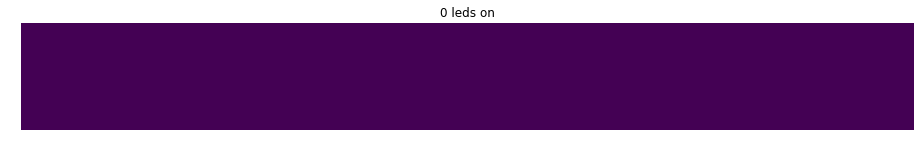

In [254]:
def plot(grid):
    """takes in a array and plots it"""
    binary_grid = [c == "#" for c in [row for row in grid]]
    plt.figure(figsize=(16,2))
    plt.imshow(binary_grid)
    plt.title(f"{np.sum(binary_grid)} leds on")
    plt.axis('off')
    plt.show()

plot(grid)

Plotting a random grid just to see how it looks

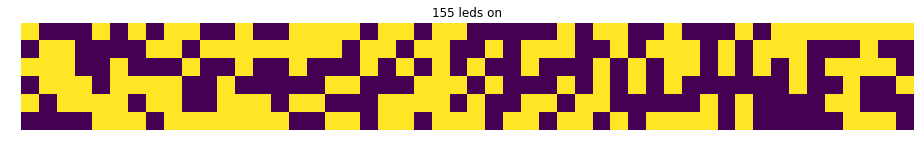

In [255]:
msk = np.random.randint(0, 2, (6,50)) == 1
grid[msk] = "#"
plot(grid)

now to step through the instructions:

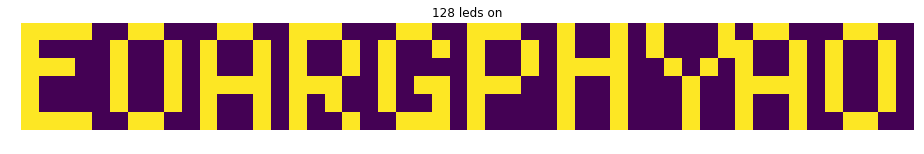

In [256]:
import time
from IPython.display import display, clear_output

def step(line):
    """performs one step on the grid"""
    
    x, y = [int(i) for i in re.findall("\d+", line)]
    
    if line.startswith("rect"):
        grid[0:y,0:x] = "#"
    elif line.startswith("rotate row"):
        grid[x,:] = rotate(grid[x,:],y)
    elif line.startswith("rotate column"):
        grid[:,x] = rotate(grid[:,x],y)

grid = np.full((6, 50), ".")   # starting with a blank grid

for i, line in enumerate(data):
    step(line) # update the grid
    # display the grid after each update
    clear_output(wait=True)
    plot(grid)
    time.sleep(0.01)

# --- Part Two ---

You notice that the screen is only capable of displaying capital letters; in the font it uses, each letter is 5 pixels wide and 6 tall.

After you swipe your card, **what code is the screen trying to display?**

There are many OCR libraries for python, which should be able to read this pretty easily, but since its such a small output, I eyeballed it to be `EOARGPHYAO`.

# Notes:

- animate the steps using matplotlib, not just text